We present here the solution of a simple 1D diffusion problem, Fig. 1, which we can compare with the analytical solution. We consider that all H resides in lattice sites, i.e there are no traps and $\bar{C} = \bar{C}_L$. Fig. 1 shows a bar of length $l = 50 mm$. $\bar{C}_L = 0$ throughout the bar and at time $t = 0$ the concentration at one end is increased to $100 mol/m^3$. Fig. 1 shows the full transient solution. The governing equation for this problem is well known as well as the analytic solution [20]:

$$\frac{\partial \bar{C}_L^2}{\partial x^2} = \frac{1}{D_L} \frac{\partial \bar{C}_L}{\partial t} \quad \text{Eq. 26}$$

The analytic solution reads:

$$\bar{C}_L(x, t) = \bar{C}_0 + \frac{x}{l} (\bar{C}_l - \bar{C}_0) + \sum_{n=1}^{\infty} c_n exp\left(-\frac{n^2 \pi^2 D_L t}{l^2}\right) \sin\left(\frac{n \pi x}{l}\right) \quad \text{Eq. 27}$$

and the Fourier series coefficient is given by:

$$ c_n = \frac{2}{l} \int_{0}^{l} f(x) \sin \left( \frac{n\pi x}{l} \right) dx + \frac{2}{n\pi} \left[ -1^n (\bar{C}_l - \bar{C}_0) \right ] \quad \text{Eq. 28}$$ 


Eq. (26) is essentially a simplified version of (19) in which the term $\frac{\partial \bar{C}}{\partial \bar{C}_L} = 0$ and the last two terms of (19) are zero. Eq. (26) is implemented in UMATHT by simply coding the following terms:

$$\dfrac{\partial \bar{C}}{\partial \bar{C}_L} = 1 \quad \text{Eq. 29}$$

$$\dfrac{\partial \mathbf{\bar{J}}_m}{\partial (\nabla \bar{C}_L)} = -D_L \mathbf{I} \quad \text{Eq. 30}$$

Fig. 1 shows the transient hydrogen concentration distribution along the bar for both the analytical and computational solution. The value of diffusivity is $D_L = 3.8 \times 10^{-11} m^2/s$ and the computations were conducted using quadratic continuum coupled temperature-displacements hybrid element i.e. CPE8HT. The characteristic time for diffusion (i.e. time necessary for hydrogen to diffuse along the bar) can be determined by using the well known relation $t = \frac{l^2}{D_L} = 6.5 \times 10^7 s$. Here we consider a fixed time step of $dt = 1 \times 10^4 s$ and a total time of $t = 1 \times 10^6 s$. The Abaqus results almost perfectly agree with the analytic solution of (27).


65789473.68421054


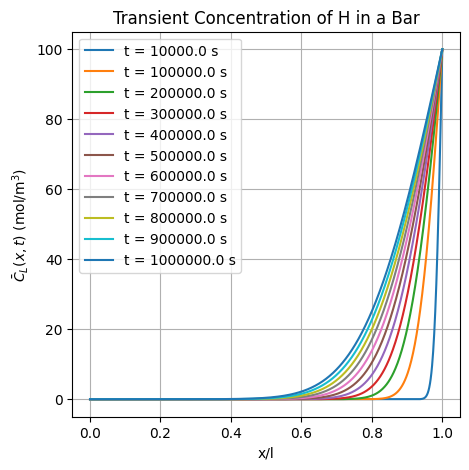

In [1]:
import numpy as np
import matplotlib.pyplot as plt

D_L = 3.8e-11  # Diffusivity in m^2/s
l = 0.05  # Length of the bar in meters
Cbar_0 = 0  # Initial concentration at x=0 in mol/m^3
Cbar_l = 100  # Concentration at one end (x=l) in mol/m^3
n_terms = 100  # Number of terms in the Fourier series for accuracy
               # In the equation it is an infinite series, but we will use a finite number of terms
t1 = 1e4  # Time t=1 in seconds
t2 = 2e4  # Time t=2 in seconds

def calculate_c_n(x, n):
    fx = np.zeros_like(x)
    fx[-1] = Cbar_l
    term1 = 2/(n * np.pi) * ((-1)**n * (Cbar_l - Cbar_0))
    term2 = 2/l * np.trapz(fx * np.sin(n * np.pi * x / l), x)
    return term1 + term2

# Function to calculate C_L(x, t) using the analytical solution
def Cbar_L(x, t):
    """
    x: array of linearly spacing position on the bar in meters from 0 to l => x/l is from 0 to 1
    t: scalar value, time in seconds
    """
    sum_series = np.zeros_like(x)
    #previous_x = np.zeros_like(x)
    for n in range(1, n_terms + 1):
        c_n = calculate_c_n(x, n)
        term = c_n * np.exp(- (n**2 * np.pi**2 * D_L * t) / l**2) * np.sin(n * np.pi * x / l)
        sum_series += term
        # previous_x = term
    Cbar_L_term = Cbar_0 + (x / l) * (Cbar_l - Cbar_0) + sum_series
    return Cbar_L_term

x_values = np.linspace(0, l, 1000)

dt = 10**4 # s
total_time = 10**6 # s
t_diffused_all_bar = l**2/D_L
print(t_diffused_all_bar)
times = [1e4, 1e5, 2e5, 3e5, 4e5, 5e5, 6e5, 7e5, 8e5, 9e5, 10e5]

plt.figure(figsize=(5, 5))

for t in times:
    Cbar_L_values = Cbar_L(x_values, t)
    plt.plot(x_values / l, Cbar_L_values, label=f't = {t} s')

plt.xlabel('x/l')
plt.ylabel(r'$\bar{C}_L(x, t)$ (mol/m$^3$)')
plt.title('Transient Concentration of H in a Bar')
plt.legend()
plt.grid(True)
plt.show()
